In [28]:
import pandas as pd

# 读取数据
file_path = 'data/carbonmonitor-cities_datas_2024-09-01.csv'
data = pd.read_csv(file_path)

# 查看数据的前几行
print(data.head())

# 查看数据的基本信息
print(data.info())

# 查看缺失值情况
print(data.isnull().sum())


        city        date    sector     value   timestamp
0  Melbourne  01/01/2019  Aviation  0.000817  1546300800
1  Melbourne  02/01/2019  Aviation  0.000935  1546387200
2  Melbourne  03/01/2019  Aviation  0.001007  1546473600
3  Melbourne  04/01/2019  Aviation  0.000954  1546560000
4  Melbourne  05/01/2019  Aviation  0.000958  1546646400
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451800 entries, 0 to 451799
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   city       451800 non-null  object 
 1   date       451800 non-null  object 
 2   sector     451800 non-null  object 
 3   value      451800 non-null  float64
 4   timestamp  451800 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 17.2+ MB
None
city         0
date         0
sector       0
value        0
timestamp    0
dtype: int64


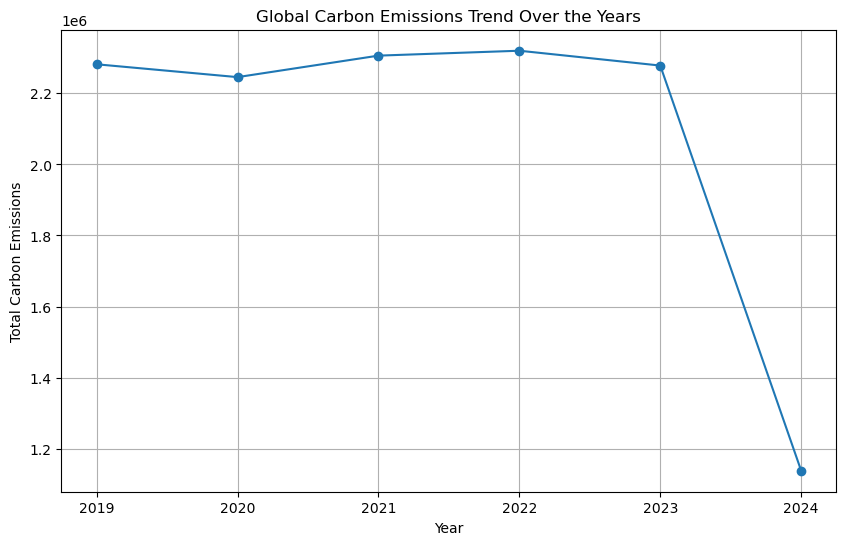

In [29]:
import matplotlib.pyplot as plt

# 转换日期格式
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y')

# 按年统计全球碳排放总量
data['year'] = data['date'].dt.year
global_trend = data.groupby('year')['value'].sum().reset_index()

# 绘制全球碳排放趋势图
plt.figure(figsize=(10, 6))
plt.plot(global_trend['year'], global_trend['value'], marker='o')
plt.title('Global Carbon Emissions Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Carbon Emissions')
plt.grid(True)
plt.show()


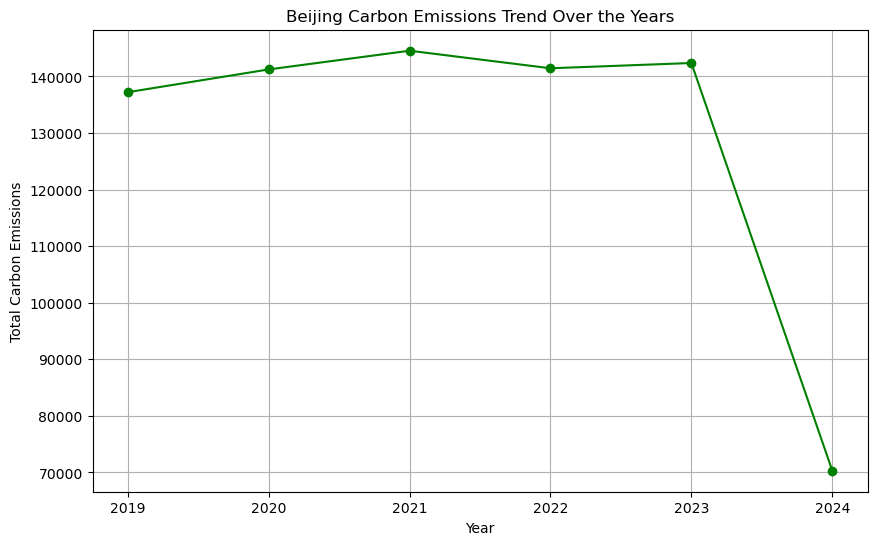

In [30]:
# 选择特定城市的数据
city_name = 'Beijing'  # 你可以更改为实际的城市名
city_data = data[data['city'] == city_name]

# 按年统计该城市碳排放总量
city_trend = city_data.groupby('year')['value'].sum().reset_index()

# 绘制该城市历年碳排放趋势图
plt.figure(figsize=(10, 6))
plt.plot(city_trend['year'], city_trend['value'], marker='o', color='green')
plt.title(f'{city_name} Carbon Emissions Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Carbon Emissions')
plt.grid(True)
plt.show()


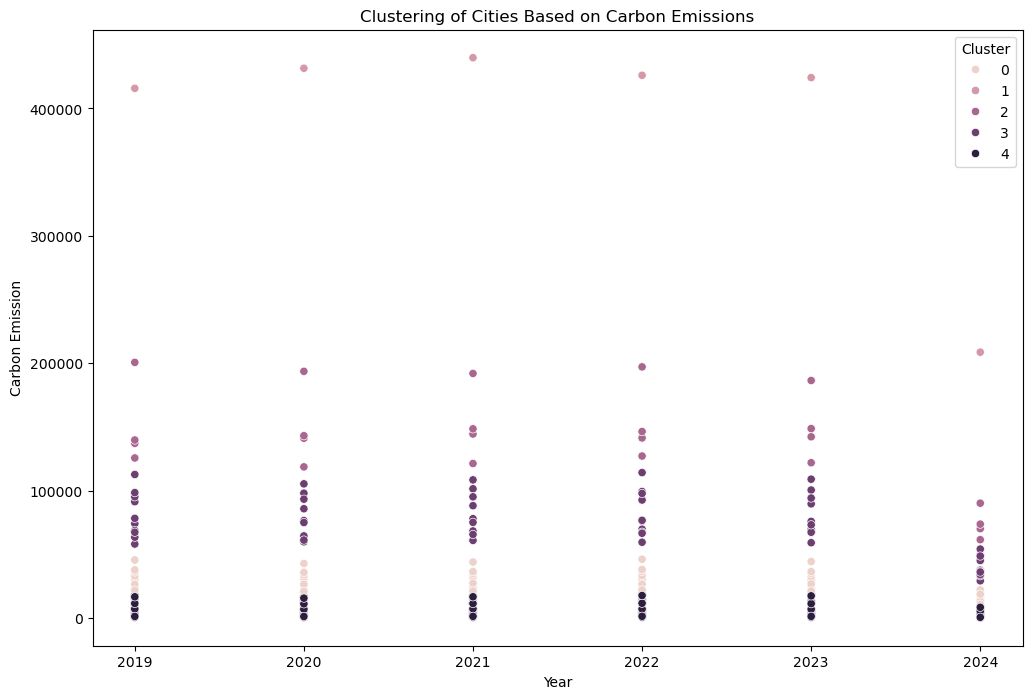

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

# 按城市和年份统计碳排放总量
city_year_data = data.groupby(['city', 'year'])['value'].sum().unstack()

# 数据标准化
scaler = StandardScaler()
scaled_data = scaler.fit_transform(city_year_data.fillna(0))

# 使用KMeans聚类分析
kmeans = KMeans(n_clusters=5, random_state=42)  # 假设分为5类
city_year_data['cluster'] = kmeans.fit_predict(scaled_data)

# 可视化聚类结果
plt.figure(figsize=(12, 8))
sns.scatterplot(x='year', y='value', hue='cluster', data=city_year_data.melt(id_vars=['cluster']))
plt.title('Clustering of Cities Based on Carbon Emissions')
plt.xlabel('Year')
plt.ylabel('Carbon Emission')
plt.legend(title='Cluster')
plt.show()


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

X = np.arange(len(city_data)).reshape(-1, 1)  # 时间索引作为输入特征
y = city_data.values  # 碳排放量作为输出

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train
y_train

In [33]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# 定义高斯过程核函数
kernel = C(1.0, (1e-4, 1e1)) * RBF(10, (1e-2, 1e2))

# 初始化高斯过程回归模型
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# 拟合训练数据
gpr.fit(X_train, y_train)


ValueError: could not convert string to float: 'Beijing'